In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load cleaned data
df = pd.read_csv('cleaned_weather_data.csv', parse_dates=['date'])

In [3]:
df.head()

,date,location_id,temperature,rainfall,wind_speed,precipitation
0,2010-01-01,0,26.0,0.0,12.2,0.0
1,2010-01-02,0,26.4,15.7,11.6,15.7
2,2010-01-03,0,28.0,0.0,13.0,0.0
3,2010-01-04,0,27.5,7.4,13.6,7.4
4,2010-01-05,0,27.7,9.6,10.3,9.6


In [4]:
# 1. Variables overview
print("Dataframe info:")
print(df.info())
print("\nStatistical summary:")
print(df.describe())

Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142371 entries, 0 to 142370
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   date           142371 non-null  datetime64[ns]
 1   location_id    142371 non-null  int64         
 2   temperature    142371 non-null  float64       
 3   rainfall       142371 non-null  float64       
 4   wind_speed     142371 non-null  float64       
 5   precipitation  142371 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 6.5 MB
None

Statistical summary:
                                date    location_id    temperature  \
count                         142371  142371.000000  142371.000000   
mean   2017-03-22 02:34:50.498767360      13.000000      25.730017   
min              2010-01-01 00:00:00       0.000000      12.100000   
25%              2013-08-11 00:00:00       6.000000      24.700000   
50%         

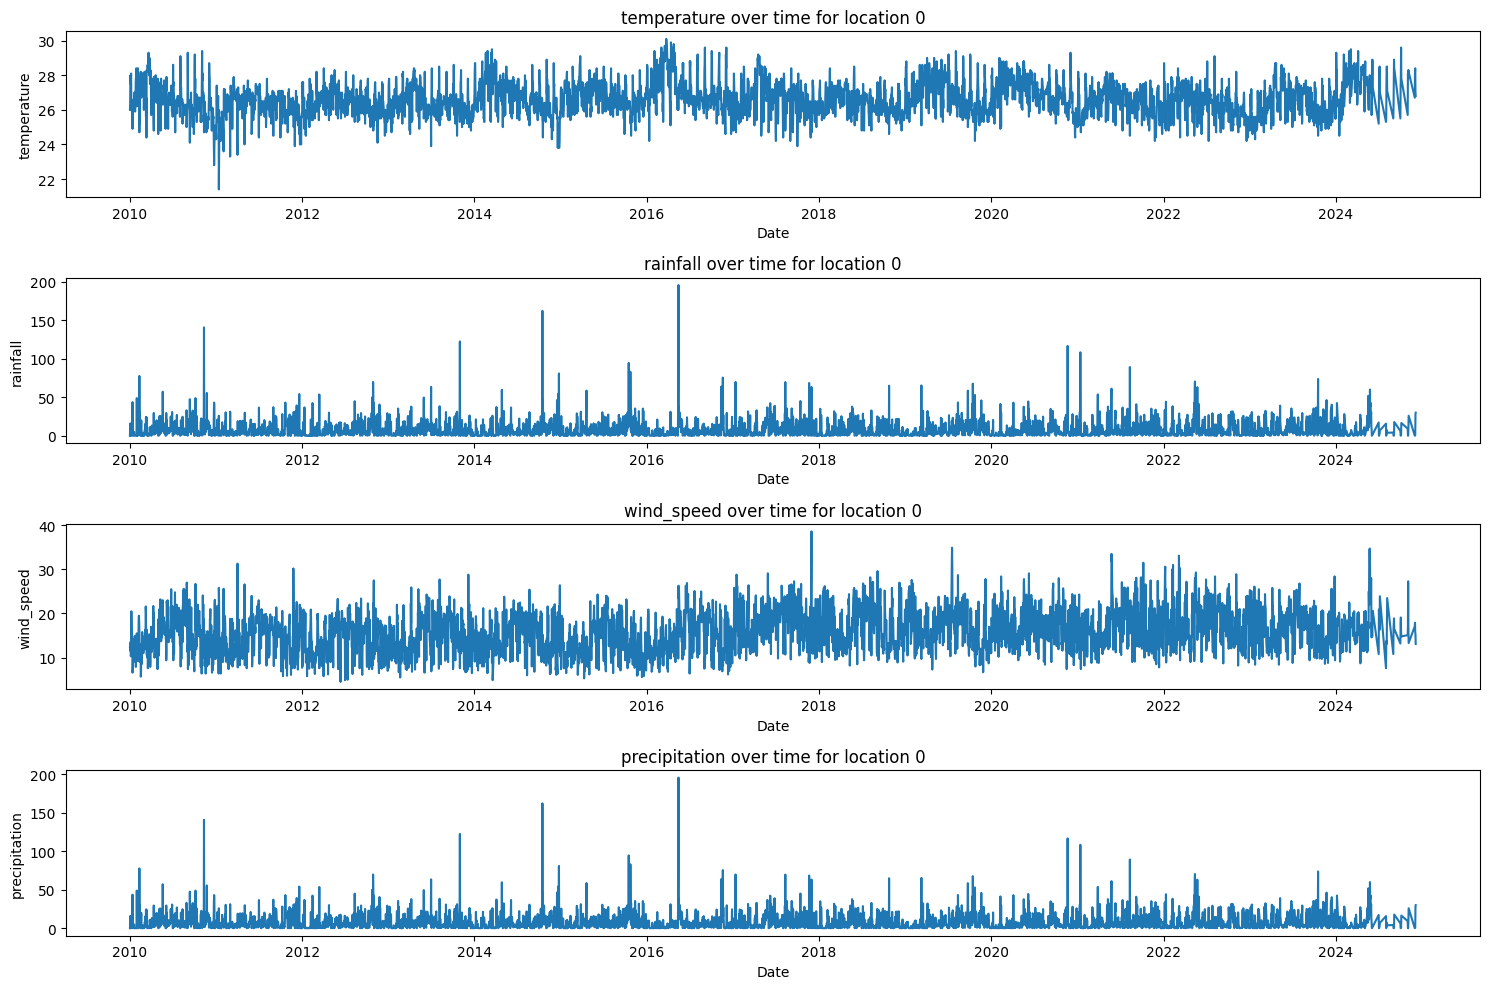

In [5]:
# 2. Plot time series for each variable (for a sample location)
sample_location = df['location_id'].unique()[0]
df_sample = df[df['location_id'] == sample_location]

plt.figure(figsize=(15,10))
variables = ['temperature', 'rainfall', 'wind_speed', 'precipitation']
for i, var in enumerate(variables, 1):
    plt.subplot(len(variables), 1, i)
    plt.plot(df_sample['date'], df_sample[var])
    plt.title(f'{var} over time for location {sample_location}')
    plt.xlabel('Date')
    plt.ylabel(var)
    plt.tight_layout()
plt.show()

In [6]:
# 3. Check correlations (on the sample location)
corr = df_sample[variables].corr()
print("\nCorrelation matrix:")
print(corr)


Correlation matrix:
               temperature  rainfall  wind_speed  precipitation
temperature       1.000000 -0.346849    0.061213      -0.346849
rainfall         -0.346849  1.000000    0.069597       1.000000
wind_speed        0.061213  0.069597    1.000000       0.069597
precipitation    -0.346849  1.000000    0.069597       1.000000


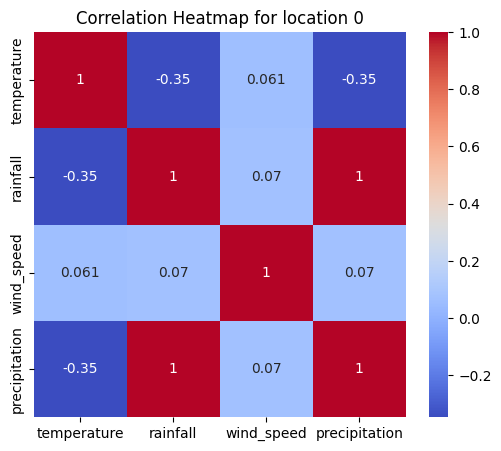

In [7]:
# Plot correlation heatmap
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title(f'Correlation Heatmap for location {sample_location}')
plt.show()

In [8]:
# 4. Detect seasonality/trends/outliers
# Plot rolling mean and rolling std to check trend and seasonality for temperature
window = 30  # days
df_sample = df_sample.set_index('date')
rolling_mean = df_sample['temperature'].rolling(window=window).mean()
rolling_std = df_sample['temperature'].rolling(window=window).std()

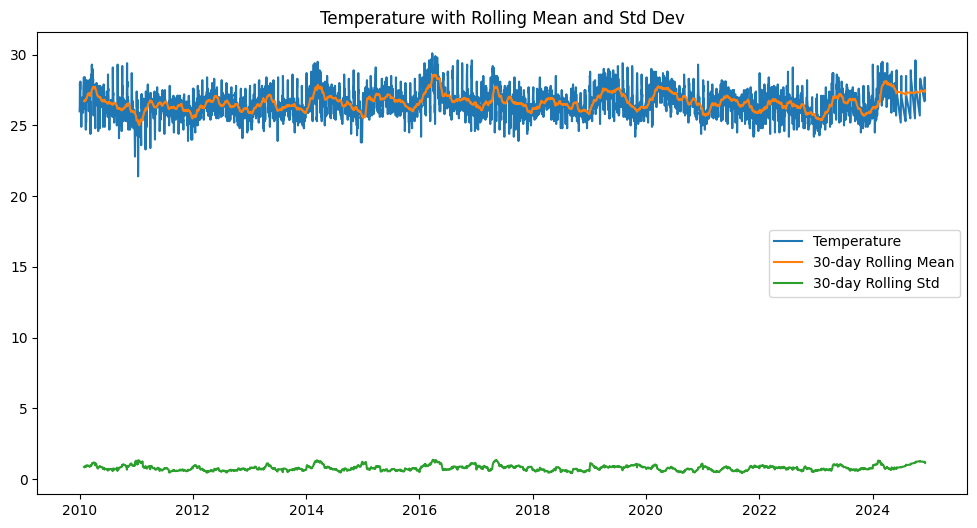

In [9]:
plt.figure(figsize=(12,6))
plt.plot(df_sample['temperature'], label='Temperature')
plt.plot(rolling_mean, label=f'{window}-day Rolling Mean')
plt.plot(rolling_std, label=f'{window}-day Rolling Std')
plt.title('Temperature with Rolling Mean and Std Dev')
plt.legend()
plt.show()

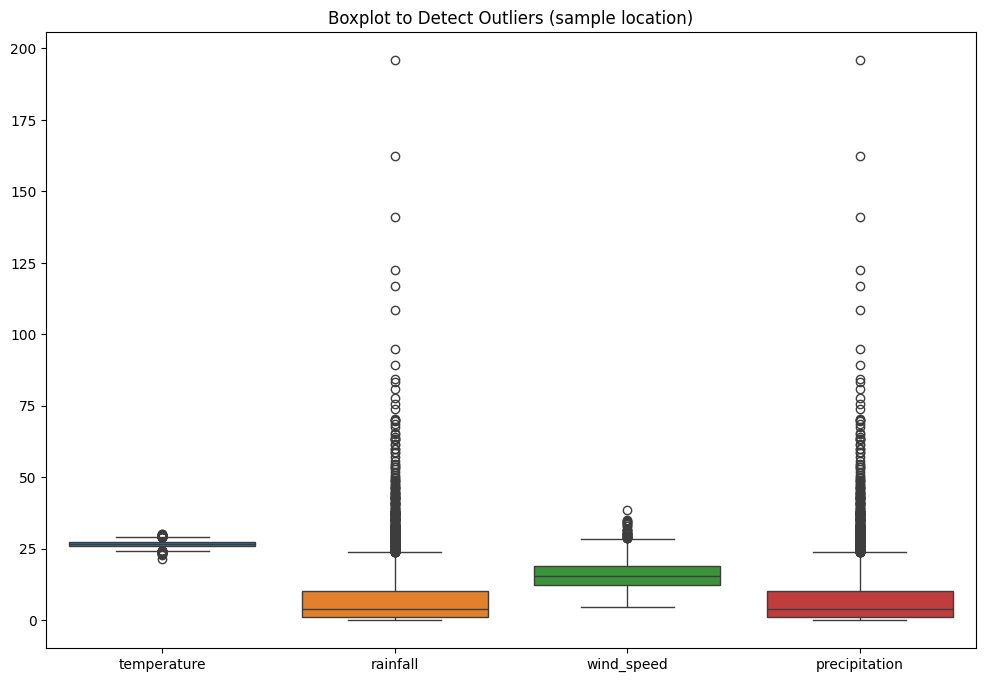

In [10]:
# Boxplot to detect outliers for each variable (sample location)
plt.figure(figsize=(12,8))
sns.boxplot(data=df_sample[variables])
plt.title('Boxplot to Detect Outliers (sample location)')
plt.show()